<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IMPORT-PACKAGES" data-toc-modified-id="IMPORT-PACKAGES-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>IMPORT PACKAGES</a></span><ul class="toc-item"><li><span><a href="#Import-customize-functions-for-fitting-data" data-toc-modified-id="Import-customize-functions-for-fitting-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import customize functions for fitting data</a></span></li><li><span><a href="#Python-library-for-colourblind" data-toc-modified-id="Python-library-for-colourblind-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Python library for colourblind</a></span></li></ul></li><li><span><a href="#LOAD-DATA" data-toc-modified-id="LOAD-DATA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>LOAD DATA</a></span><ul class="toc-item"><li><span><a href="#Amplification-data-&amp;-Melting-curves-DATAFRAMEs" data-toc-modified-id="Amplification-data-&amp;-Melting-curves-DATAFRAMEs-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Amplification data &amp; Melting curves DATAFRAMEs</a></span></li><li><span><a href="#Concatenating-all-the-DF-for-AC-and-MC" data-toc-modified-id="Concatenating-all-the-DF-for-AC-and-MC-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Concatenating all the DF for AC and MC</a></span></li><li><span><a href="#Master-dataframes-for-AC-and-MC" data-toc-modified-id="Master-dataframes-for-AC-and-MC-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Master dataframes for AC and MC</a></span></li></ul></li><li><span><a href="#DATA-PROCESSING" data-toc-modified-id="DATA-PROCESSING-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>DATA PROCESSING</a></span><ul class="toc-item"><li><span><a href="#Amplification-curve-processing" data-toc-modified-id="Amplification-curve-processing-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Amplification curve processing</a></span></li><li><span><a href="#Melting-curve-processing" data-toc-modified-id="Melting-curve-processing-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Melting curve processing</a></span></li><li><span><a href="#Master-DF-True-Positives" data-toc-modified-id="Master-DF-True-Positives-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Master DF True Positives</a></span></li></ul></li><li><span><a href="#CURVE-FITTING-AND-NORMALIZATION" data-toc-modified-id="CURVE-FITTING-AND-NORMALIZATION-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>CURVE FITTING AND NORMALIZATION</a></span><ul class="toc-item"><li><span><a href="#Creating-a-dataframe-with-only-&quot;Fitting-parameters&quot;" data-toc-modified-id="Creating-a-dataframe-with-only-&quot;Fitting-parameters&quot;-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Creating a dataframe with only "Fitting parameters"</a></span></li><li><span><a href="#Normalisation-(has-to-be-fixed)" data-toc-modified-id="Normalisation-(has-to-be-fixed)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Normalisation (has to be fixed)</a></span></li></ul></li></ul></div>

# IMPORT PACKAGES

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from tqdm.auto import tqdm
import time
from datetime import datetime

## Import customize functions for fitting data

In [4]:
import python_libraries.fitting_func as fitfunc
import python_libraries.peak_finder as peakfunc
import python_libraries.plotting_func as plotfunc
import python_libraries.utilities as utils

## Python library for colourblind
need to be integrated into python library.

In [5]:
import matplotlib as mpl
from cycler import cycler
from matplotlib.colors import to_hex
mpl.rcParams['axes.prop_cycle'] = cycler(color=[to_hex(i) for i in
                                                [(0,0.45,0.70),
                                                (0.9, 0.6, 0.0),
                                                (0.0, 0.60, 0.50),
                                                (0.8, 0.4, 0),
                                                (0.35, 0.7, 0.9),
                                                (0.8, 0.6, 0.7),
                                                (0,0,0),
                                                (0.5, 0.5, 0.5),
                                                (0.286, 0, 0.573)]])

# LOAD DATA

## Amplification data & Melting curves DATAFRAMEs

## Concatenating all the DF for AC and MC
NMETA are the column of metadata, usually we need to skip them to operate with np.array

In [20]:
NMETA = 6 # number of meta columns (use for skipping)
PM = "5plex_A"

# number of reaction in the 3 digital chip
df_ac_raw = pd.read_csv('dataframe_saved/00_df_raw_AC.csv', index_col=0)
print(f'The number of data point (wells) for "RM5" including negatives for the 3 experiments is: {df_ac_raw.shape[0]}')

The number of data point (wells) for "RM5" including negatives for the 3 experiments is: 110880


In [27]:
df_master_no_ntc = pd.read_csv('dataframe_saved/01_df_master_filt.csv', index_col=0)
df_master_no_ntc

,Channel,PrimerMix,Target,Assay,Conc,Exp_id,MeltPeaks,1.0,2.0,3.0,...,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0
163,panel31,5plex_A,ad,RM5,10000,20201202_01,89.891032,0.002267,-0.000116,-0.002151,...,0.857027,0.860285,0.861350,0.862313,0.865087,0.868469,0.868767,0.866020,0.863320,0.859830
758,panel31,5plex_A,ad,RM5,10000,20201202_01,89.988709,0.000256,-0.000021,-0.000234,...,0.769405,0.789562,0.806199,0.819269,0.830892,0.840751,0.848472,0.852250,0.855393,0.857357
773,panel32,5plex_A,ad,RM5,10000,20201202_01,89.922761,0.011026,-0.000079,-0.010947,...,0.865367,0.870166,0.874423,0.879303,0.883929,0.891143,0.898757,0.903821,0.907025,0.909138
883,panel32,5plex_A,ad,RM5,10000,20201202_01,90.251498,0.010897,-0.000136,-0.010761,...,0.821305,0.824715,0.828080,0.829484,0.827414,0.825484,0.826902,0.831704,0.833142,0.831284
1273,panel32,5plex_A,ad,RM5,10000,20201202_01,90.061983,0.010105,-0.000113,-0.009991,...,0.891640,0.897069,0.904282,0.910942,0.919224,0.924997,0.927717,0.928439,0.929521,0.930995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103938,panel36,5plex_A,kp,RM5,1000000,20201202_01,88.486896,0.000444,0.000226,-0.000670,...,1.118999,1.118776,1.118571,1.118722,1.116910,1.115785,1.112544,1.109272,1.107108,1.104113
103939,panel36,5plex_A,kp,RM5,1000000,20201202_01,88.496313,0.001598,0.000032,-0.001630,...,1.107721,1.108707,1.109086,1.108789,1.108523,1.106693,1.103605,1.101456,1.096478,1.091179
103940,panel36,5plex_A,kp,RM5,1000000,20201202_01,88.539663,0.002281,0.000475,-0.002756,...,1.069971,1.091408,1.107140,1.116082,1.122640,1.124441,1.129477,1.134688,1.138616,1.142172
103942,panel36,5plex_A,kp,RM5,1000000,20201202_01,88.544792,0.002280,0.000304,-0.002584,...,1.027195,1.024911,1.020385,1.014528,1.011578,1.011691,1.011061,1.008867,1.003898,0.999376


<AxesSubplot:>

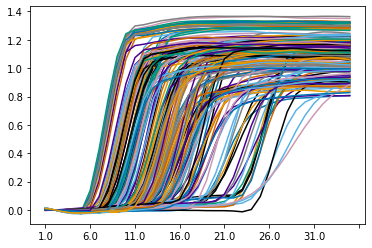

In [28]:
df_master_no_ntc.iloc[:,NMETA+1:].sample(200).T.plot(legend=False)

In [29]:
df_master_no_ntc.Target.unique()

array(['ad', 'c19', 'ia', 'ib', 'kp'], dtype=object)